1 - Import the necessary libraries

In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
%matplotlib inline

 2 - Read the data as a data frame 

In [79]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3 - Perform basic EDA which should include the following and print out your insights
at every step.

a. Shape of the data

In [80]:
df.shape

(1338, 7)

b. Data type of each attribute

In [81]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values

In [82]:
df.isnull().sum().sort_values(ascending=False)

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

d. 5 point summary of numerical attributes

In [83]:
df[['age','bmi','children','charges']].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015FA5908>]],
      dtype=object)

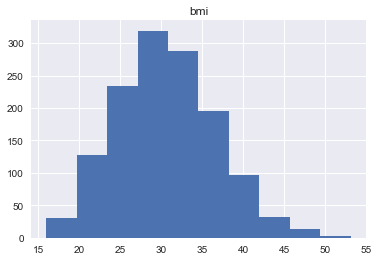

In [84]:
df.hist(column='bmi')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008155630>]],
      dtype=object)

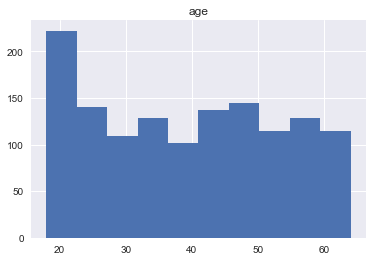

In [85]:
df.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000175A9A20>]],
      dtype=object)

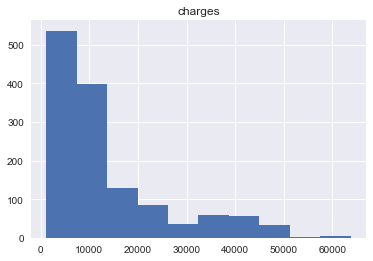

In [86]:
df.hist(column='charges')

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [87]:
df[['bmi','age','charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

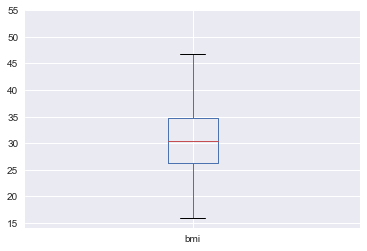

In [88]:
df.boxplot(column="bmi",return_type='axes')

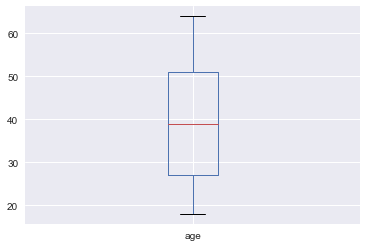

In [89]:
df.boxplot(column="age",return_type='axes')

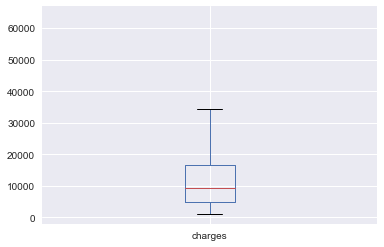

In [90]:
df.boxplot(column="charges",return_type='axes')

h. Distribution of categorical columns (include children)

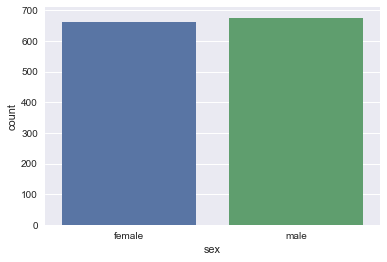

In [91]:
sns.countplot(df['sex'])

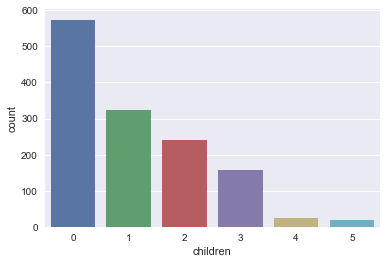

In [92]:
sns.countplot(df['children'])

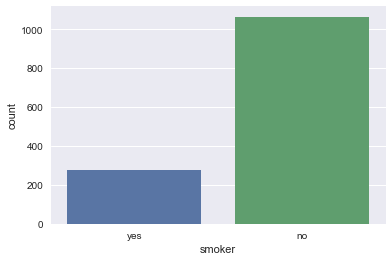

In [93]:
sns.countplot(df['smoker'])

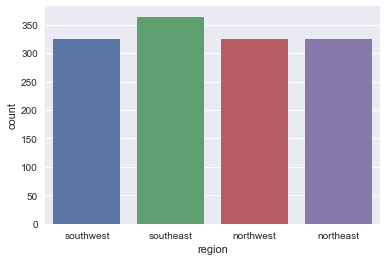

In [94]:
sns.countplot(df['region'])

i. Pair plot that includes all the columns of the data frame

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


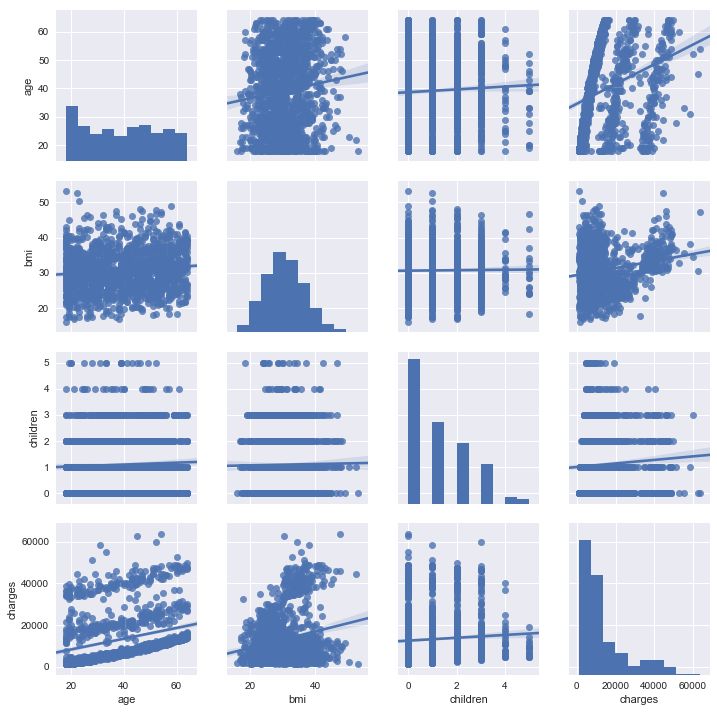

In [95]:
sns.pairplot(df, kind="reg")

4. Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly from the people who
don't?

In [96]:
# Divide the data in smoker and non smoker groups
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']


In [97]:
# two-sample t-test
# null hypothesis: the two groups have the same charges
# level of significance = 0.05 

from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(t_statistic, p_value)


46.664921172723716 8.271435842177219e-283


ince the P value is low then level of significant , we reject the null hypothesis.

Answer : Cherges are significantly different for snmokers and non-smokers 

b. Does bmi of males differ significantly from that of females?

In [98]:
# Divide the data into 2 groups containtaining bmi of male and females
female_bmi = df[df['sex'] == 'female']['bmi']
male_bmi = df[df['sex'] == 'male']['bmi']

In [99]:
# two-sample t-test
# null hypothesis: the two groups have the same bmi
# level of significance = 0.05

t_statistic, p_value = ttest_ind(female_bmi, male_bmi)
print(t_statistic, p_value)

-1.696752635752224 0.08997637178984932


Since the P value is greater the level of significance for test , we fail to reject the null hypothesis

Answer: bmi of males does not differ significantly from that of females.

-------------------------------------------------------------------------------------------------

Is the proportion of smokers significantly different in different genders?

In [100]:
# Ho = The proportions are equal
# Ha = The two proportions are not equal
# level of significance = 0.05 

female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])

[115, 159] [662, 676]


In [101]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(stat, pval)

-2.7867402154855503 0.005324114164320532


Since the P value is low then level of significant. we reject the null hypothesis.

Answer : Yes, proportion of smokers significantly different in different genders.

---------------------------------------------------------------------------------------------------------------------

d. Is the distribution of bmi across women with no children, one child and
two children, the same?

In [102]:
#lets compute the mean bmi of women with no children, one child and two children, to check there values.

print ("mean bmi of women with 0 children {}".format(df[df['children'] == 0]['bmi'].mean()))
print ("mean bmi of women with 1 children {}".format(df[df['children'] == 1]['bmi'].mean()))
print ("mean bmi of women with 2 children {}".format(df[df['children'] == 2]['bmi'].mean()))



df['children'].replace(to_replace=0, value='Zero', inplace=True)
df['children'].replace(to_replace=1, value='one', inplace=True)
df['children'].replace(to_replace=2, value='two', inplace=True)

df_for_test = df[(df['children'] == 'Zero') | (df['children'] == 'one') | (df['children'] == 'two') ]


mean bmi of women with 0 children 30.550296167247392
mean bmi of women with 1 children 30.623148148148143
mean bmi of women with 2 children 30.97810416666667


for one way ANOVA State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs

 α = 0.05


In [103]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = df_for_test).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
children     31.631915     2.0  0.416983  0.659133
Residual  43049.991501  1135.0       NaN       NaN


Since the P value(0.65) is greater the level of significance for test , we fail to reject the null hypothesis

Answer : Yes, bmi across women with no children, one child and two children, the same.